In [2]:

#This is my first Tidy Tuesday challenge. I will be starting with first challenge.
#United States Tuition costs, 02/04/2018

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tuition = pd.read_excel(r"C:\Users\mehta\Downloads\us_avg_tuition.xlsx")

#So we can see that we've got statewise average tuition cost data fromm all the 50 states of US from 2004-2016. 
# =============================================================================
# Some of the things that we can look into are:
#     1) Overall average of each year
#     2) Getting Overall average of each state 
#     3) Making Chloropeths for *2*
#     4) Trying to predict the 2015-16 averages using previous 5 years data.
#     5) We can create an errorbar showing each state's max and min along with the average after inflation adjustment 
# =============================================================================
            
inf = pd.read_excel(r"C:\Users\mehta\Documents\us_annualinf.xlsx", header = None)[[0,15]].loc[:11]


In [4]:
inf.columns = ["Year","Inf"]
inf.Inf = inf.Inf.iloc[-1]/inf.Inf #Getting inflation adjustment factors to get all values in terms of 2015-16 rates.
tuition[tuition.select_dtypes('number').columns] = tuition.select_dtypes('number')*np.asarray(inf.T.iloc[1])
tuition["avg"] = tuition.select_dtypes('number').mean(axis=1)
tuition["max"] = tuition.select_dtypes('number').max(axis=1)
tuition["min"] = tuition.select_dtypes('number').min(axis=1)
tuition.sort_values("avg", ascending=False, inplace = True)


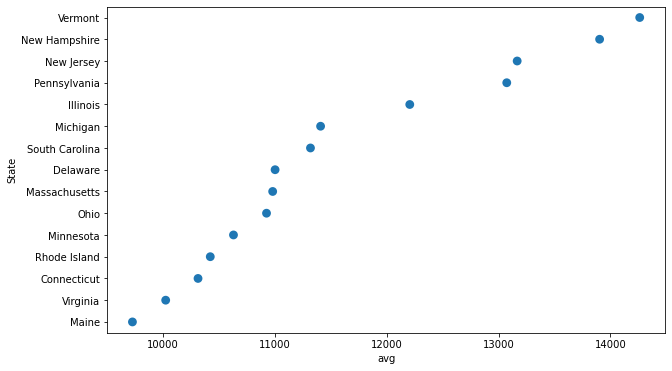

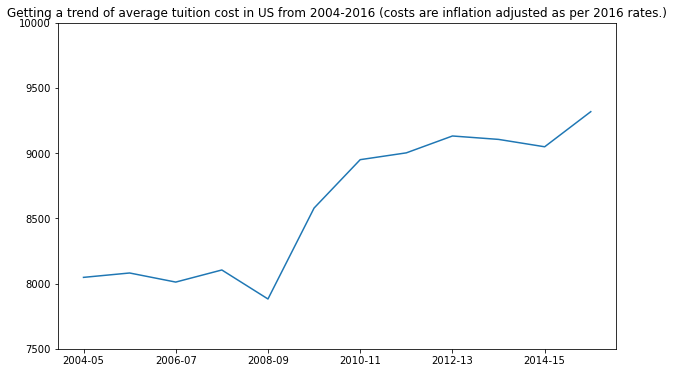

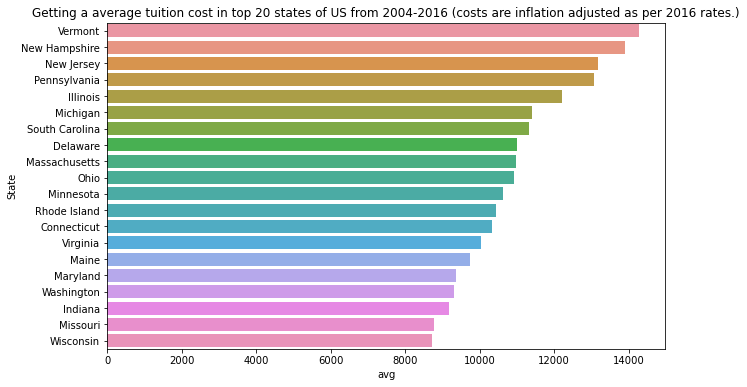

In [5]:

#Getting average of each state's tuition fees
plt.figure(figsize=(10, 6))
sns.pointplot(data=tuition.head(15), y = "State", x = "avg", join = False)
plt.show()

#Getting average of all years

plt.figure(figsize = (10,6))
tuition.mean().iloc[:-3].plot()
plt.ylim(7500,10000)
plt.title("Getting a trend of average tuition cost in US from 2004-2016 (costs are inflation adjusted as per 2016 rates.)")
plt.show()


plt.figure(figsize = (10,6))
sns.barplot("avg","State", data = tuition.head(20))
plt.title("Getting a average tuition cost in top 20 states of US from 2004-2016 (costs are inflation adjusted as per 2016 rates.)")
plt.show()